<a href="https://colab.research.google.com/github/cagBRT/Diffusers/blob/main/Schedulers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Diffusion models proved themselves very effective in artificial synthesis, even beating GANs for images. Because of that, they gained traction in the machine learning community and play an important role for systems like [DALL-E 2](https://openai.com/dall-e-2/) or [Imagen](https://imagen.research.google/) to generate photorealistic images when prompted on text.

While the most prolific successes of diffusion models have been in the computer vision community, these models have also achieved remarkable results in other domains, such as:
- [video generation](https://video-diffusion.github.io/),
- [audio synthesis](https://diffwave-demo.github.io/),
- [reinforcement learning](https://diffusion-planning.github.io/),
- and more.

However, most of the recent research on diffusion models, *e.g.* DALL-E 2 and Imagen, is unfortunately not accessible to the broader machine learning community and typically remains behind closed doors.



### Summary
This post is designed to showcase the core API of `diffusers`, which is divided into three components:
1. **Pipelines**: high-level classes designed to rapidly generate samples from popular trained diffusion models in a user-friendly fashion.
2. **Models**: popular architectures for training new diffusion models, *e.g.* [UNet](https://arxiv.org/abs/1505.04597).
3. **Schedulers**: various techniques for generating images from noise during *inference* as well as to generate noisy images for *training*.


In [1]:
!pip3 install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 47.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 52.4 MB/s eta 0:00:00


In [2]:
!pip3 install accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.2/251.2 kB 5.3 MB/s eta 0:00:00


In [3]:
import transformers

In [4]:
import torch

### Install `diffusers`

In [5]:
!pip install diffusers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 989.1/989.1 kB 5.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.20.2-py3-none-any.whl size=1342633 sha256=de4071ad71935db0e64e6504b62a3c693d7a24c4e2f834091457b021bdbea9c5
  Stored in directory: /root/.cache/pip/wheels/dc/8b/d9/34f7a1936109e05e9bba0cc2241a6f8cd89e25959dc7aae942
Successfully built diffusers


In [6]:
from transformers import pipeline
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
import tensorflow as tf
from transformers import AutoTokenizer, TFAutoModelForQuestionAnswering
from pprint import pprint
from transformers import AutoModelForMaskedLM, AutoTokenizer
import torch
from transformers import TFAutoModelForMaskedLM, AutoTokenizer
from transformers import AutoModelForCausalLM, AutoTokenizer, top_k_top_p_filtering
from torch import nn
from accelerate import Accelerator
from diffusers import DiffusionPipeline

In [7]:
!pip install diffusers

In [8]:
from diffusers import DDPMPipeline

The `from_pretrained()` method allows downloading the model and its configuration from [the Hugging Face Hub](https://huggingface.co/google/ddpm-celebahq-256), a repository of over 60,000 models shared by the community.


In [9]:
from accelerate import Accelerator

In [10]:
import torch


In [11]:
from diffusers import DDPMScheduler



Let's also take a look at the config here.

Before defining the loop, let's move the input and model to the GPU to speed up the denoising process a bit.

The DDIM scheduler allows the user to define how many denoising steps should be run at inference via the `set_timesteps` method. The DDPM scheduler runs by default 1000 denoising steps. Let's significantly reduce this number to just 50 inference steps for DDIM.

And you can run the same loop as before - only that you are now making use of the much faster DDIM scheduler.

In [12]:
from diffusers import StableDiffusionPipeline, LMSDiscreteScheduler
from diffusers import StableDiffusionPipeline

In [13]:
import transformers



---



---



---



In [14]:
pipeline = DiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16)
pipeline.to("cuda")
pipeline.scheduler

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


PNDMScheduler {
  "_class_name": "PNDMScheduler",
  "_diffusers_version": "0.20.2",
  "beta_end": 0.012,
  "beta_schedule": "scaled_linear",
  "beta_start": 0.00085,
  "clip_sample": false,
  "num_train_timesteps": 1000,
  "prediction_type": "epsilon",
  "set_alpha_to_one": false,
  "skip_prk_steps": true,
  "steps_offset": 1,
  "timestep_spacing": "leading",
  "trained_betas": null
}

# Comparing Schedulers<br>
Using the same seed and the same prompt, change the scheduler to see the effect on the generated image.

In [15]:
prompt = "A photograph of an astronaut riding a horse on Mars, high resolution, high definition."

  0%|          | 0/50 [00:00<?, ?it/s]

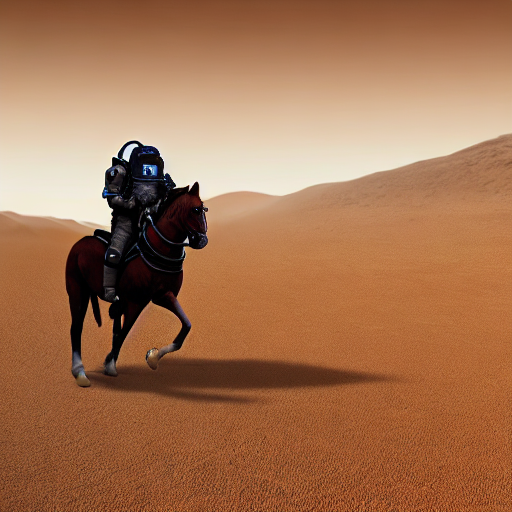

In [16]:
generator = torch.Generator(device="cuda").manual_seed(8)
image = pipeline(prompt, generator=generator).images[0]
image

In [17]:
#generator = torch.Generator(device="cuda").manual_seed(6)
#image = pipeline(prompt, generator=generator).images[0]
#image

  0%|          | 0/30 [00:00<?, ?it/s]

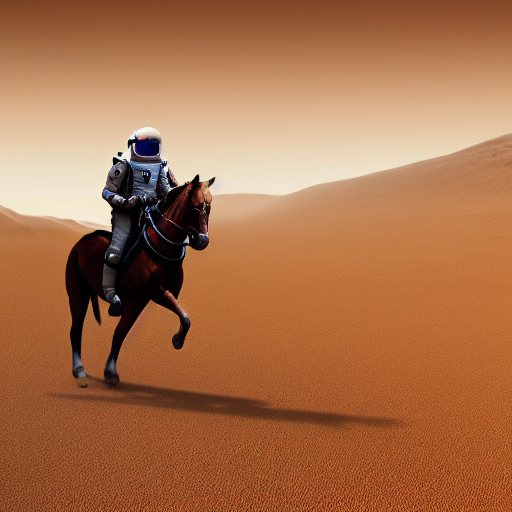

In [18]:
from diffusers import EulerDiscreteScheduler

pipeline.scheduler = EulerDiscreteScheduler.from_config(pipeline.scheduler.config)

generator = torch.Generator(device="cuda").manual_seed(8)
image = pipeline(prompt, generator=generator, num_inference_steps=30).images[0]
image

  0%|          | 0/30 [00:00<?, ?it/s]

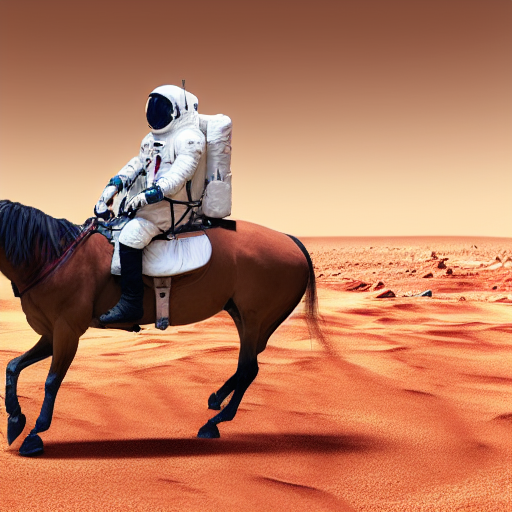

In [19]:
from diffusers import EulerAncestralDiscreteScheduler

pipeline.scheduler = EulerAncestralDiscreteScheduler.from_config(pipeline.scheduler.config)

generator = torch.Generator(device="cuda").manual_seed(8)
image = pipeline(prompt, generator=generator, num_inference_steps=30).images[0]
image

  0%|          | 0/20 [00:00<?, ?it/s]

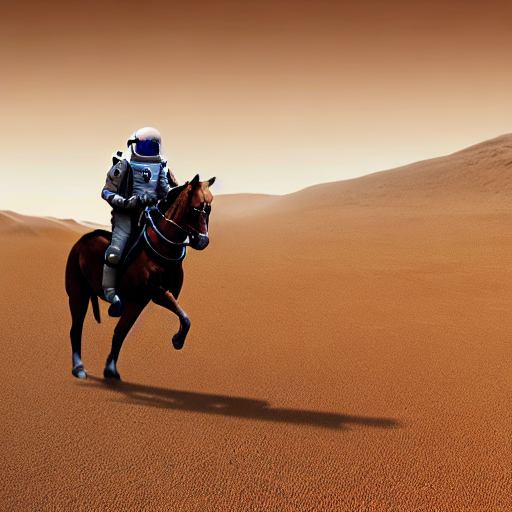

In [20]:
from diffusers import DPMSolverMultistepScheduler

pipeline.scheduler = DPMSolverMultistepScheduler.from_config(pipeline.scheduler.config)

generator = torch.Generator(device="cuda").manual_seed(8)
image = pipeline(prompt, generator=generator, num_inference_steps=20).images[0]
image